**Task 01 - Forward Kinematics:**

Given the joint angles (θ₁, θ₂, θ₃) of the 3-link robot arm, calculate the position of the end
effector (x, y) in the Cartesian 2D coordinate system.
Assume the lengths of the links are L₁, L₂, and L₃, respectively, and the joints are rotational.
Implement the kinematic equations using the Denavit-Hartenberg (D-H) parameters or
another suitable method. (Hint: Refer to supplementary material

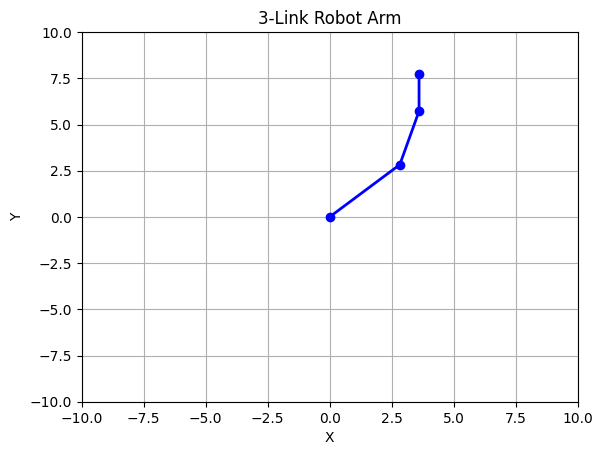

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert degrees to radians
def deg2rad(deg):
    return deg * np.pi / 180.0

# Forward kinematics function
def forward_kinematics(q1, q2, q3, l1, l2, l3):
    theta1 = deg2rad(q1)
    theta2 = deg2rad(q2)
    theta3 = deg2rad(q3)

    # Joint positions
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)

    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    x3 = x2 + l3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1 + theta2 + theta3)

    return [(0, 0), (x1, y1), (x2, y2), (x3, y3)]

# Visualization function
def visualize_robot(positions):
    x_coords, y_coords = zip(*positions)
    plt.plot(x_coords, y_coords, linewidth=2, marker='o', color='blue')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('3-Link Robot Arm')
    plt.show()

# Example
l1, l2, l3 = 4, 3, 2  # Lengths of the links
q1, q2, q3 = 45, 30, 15  # Joint angles in degrees
positions = forward_kinematics(q1, q2, q3, l1, l2, l3)
visualize_robot(positions)


**Task 02 - Inverse Kinematics:**

Develop an algorithm to compute the joint angles (θ₁, θ₂, θ₃) required to place the end effector
at a given position (x, y).
Consider the multiple solutions that might exist due to the robot's configuration (elbow
up/elbow down) and provide all valid solutions.
Address the possibility of singularities where the position may not be reachable or requires
special handling.

In [ ]:
import numpy as np
import math

# Inverse Kinematics function
def inverse_kinematics(x, y, l1, l2):
    cos_theta2 = (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)
    theta2 = np.arccos(cos_theta2)

    sin_theta2 = np.sqrt(1 - cos_theta2**2)  # positive root
    k1 = l1 + l2 * cos_theta2
    k2 = l2 * sin_theta2
    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)

    return np.degrees(theta1), np.degrees(theta2)

# Example
l1, l2 = 4, 3
x_target, y_target = 5, 3
theta1, theta2 = inverse_kinematics(x_target, y_target, l1, l2)
print(f"The joint angles are: θ₁ = {theta1:.2f}°, θ₂ = {theta2:.2f}°")


The joint angles are: θ₁ = 2.48°, θ₂ = 67.98°


**Task 03 - Simulation and Visualization:**

Create a visualization of the robot arm using a 2D plotting library (e.g., Matplotlib) to show the movement of the robot arm as it follows a series of positions. Include a graphical representation of the workspace of the robot arm, showing the reachable area. Allow the user to input a series of (x, y) coordinates and visualize the corresponding joint movements.

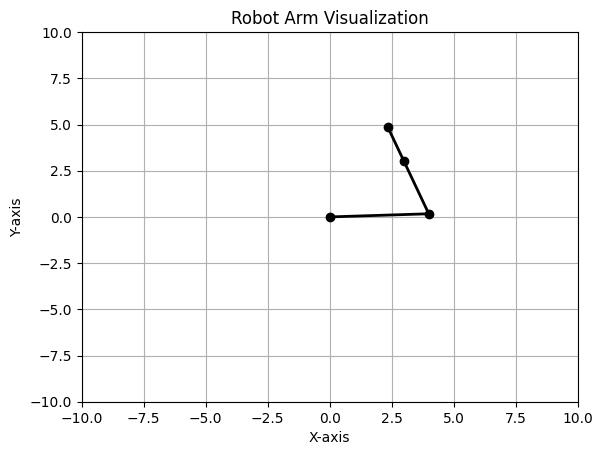

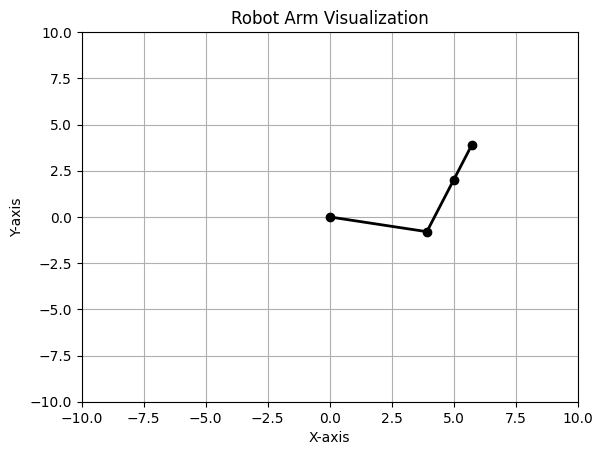

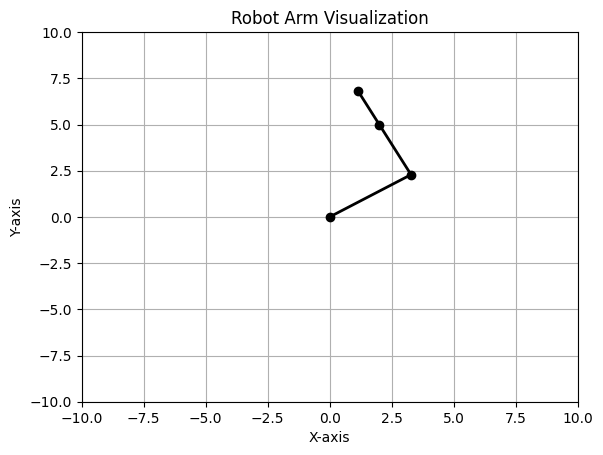

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def deg2rad(deg):
    return deg * np.pi / 180.0

def rad2deg(rad):
    return rad * 180.0 / np.pi

def inverse_kinematics(x, y, l1, l2):
    # Calculate theta2 using the cosine rule
    cos_theta2 = (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)
    sin_theta2 = np.sqrt(1 - cos_theta2**2)  # assuming sin is positive

    theta2 = np.arctan2(sin_theta2, cos_theta2)  # theta2 in radians

    # Calculate theta1 using geometric relationships
    k1 = l1 + l2 * cos_theta2
    k2 = l2 * sin_theta2

    theta1 = np.arctan2(y, x) - np.arctan2(k2, k1)  # theta1 in radians

    # Assume theta3 is zero (this can be adjusted based on the specific robot configuration)
    theta3 = 0

    return rad2deg(theta1), rad2deg(theta2), theta3

def forward_kinematics(theta1, theta2, theta3, l1, l2, l3):
    theta1 = deg2rad(theta1)
    theta2 = deg2rad(theta2)
    theta3 = deg2rad(theta3)

    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)

    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)

    x3 = x2 + l3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1 + theta2 + theta3)

    return [(0, 0), (x1, y1), (x2, y2), (x3, y3)]

def visualize_robot(positions):
    x_coordinates, y_coordinates = zip(*positions)
    plt.plot(x_coordinates, y_coordinates, linewidth=2, marker='o', color='black')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Robot Arm Visualization')
    plt.show()

def visualize_movement(target_positions, l1, l2, l3):
    for (x, y) in target_positions:
        theta1, theta2, theta3 = inverse_kinematics(x, y, l1, l2)
        positions = forward_kinematics(theta1, theta2, theta3, l1, l2, l3)
        visualize_robot(positions)

# Define target positions for the robot to move to
target_positions = [(3, 3), (5, 2), (2, 5)]
l1, l2, l3 = 4, 3, 2
visualize_movement(target_positions, l1, l2, l3)


**Task 04 - Path Planning Challenge:**

Implement a simple path planning algorithm to move the end effector from a starting position
to a target position, while avoiding predefined obstacles. The algorithm should find a
collision-free path that minimizes the total distance traveled by the end effector.

In [ ]:
import heapq

def a_star(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, rows, cols):
            if grid[neighbor[0]][neighbor[1]] == 1:  # Obstacle
                continue
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return []

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(pos, rows, cols):
    neighbors = [(pos[0] + 1, pos[1]), (pos[0] - 1, pos[1]), (pos[0], pos[1] + 1), (pos[0], pos[1] - 1)]
    return [(r, c) for r, c in neighbors if 0 <= r < rows and 0 <= c < cols]

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]

# Define the grid with obstacles
grid = [
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)
path = a_star(grid, start, goal)
print("Path found:", path)


Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
